<a href="https://colab.research.google.com/github/fabiacamile/nqueens-case-stage/blob/main/Solu%C3%A7%C3%A3oNQueens_Stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solução para o problema N-queens


---


**Descrição do problema**

O problema n-queens consiste em colocar n rainhas em um tabuleiro n x n de forma que nenhuma rainha ataque a outra


*   Problema de busca e combinatória
*   Validação do estado



NQueens.svg

###**Lógica usada no código**


---

O código usa a abordagem de backtracking para resolver o problema n-queens. O backtracking é um algoritmo de busca em profundidade.

Começa com uma solução inicial e, então, tenta encontrar soluções mais profundas. Se uma solução não for encontrada, o algoritmo volta para a solução anterior e tenta encontrar uma solução diferente.

A solução inicial, nesse caso, é um tabuleiro vazio. O algoritmo então tenta colocar uma rainha na primeira coluna. Se isso for possível, o algoritmo tenta colocar uma rainha na segunda coluna. O processo continua até que todas as rainhas estejam colocadas.

In [2]:

def is_safe(board, row, col, n):
    # Verifica se há uma rainha na mesma linha à esquerda
    for j in range(col):
        if board[row][j] == 1:
            return False

    # Verifica a diagonal superior esquerda
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Verifica a diagonal inferior esquerda
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    # Se a posição for segura, retorna True
    return True

def solve_n_queens(board, col, n, result):
    # Verifica se todas as rainhas foram colocadas
    if col == n:
        # Salva a configuração do tabuleiro com as rainhas
        config = []
        for i in range(n):
            for j in range(n):
                if board[i][j] == 1:
                    config.append(j + 1)
        result.append(config) # Adiciona a configuração ao resultado
        return

    # Tenta colocar uma rainha em cada linha na coluna atual
    for i in range(n):
        if is_safe(board, i, col, n): # Verifica se a posição é segura
            board[i][col] = 1 # Coloca a rainha
            solved = solve_n_queens(board, col + 1, n, result) # Resolve recursivamente para a próxima coluna
            board[i][col] = 0 # Remove a rainha (backtracking)
            if solved:
                return

    return False

def n_queen(n):
    result = [] # Lista para armazenar todas as configurações válidas
    board = [[0] * n for _ in range(n)] # Cria um tabuleiro vazio
    solve_n_queens(board, 0, n, result) # Chama a função principal para encontrar soluções
    return result # Retorna todas as configurações válidas encontradas

Teste do algoritmo

In [3]:
n_queen(4)

[[3, 1, 4, 2], [2, 4, 1, 3]]

###**Visualização dos resultados encontrados**

---
Plotagem gráfica dos resultados obtidos em nQueen, usando a bibliteca Matplotlib


In [24]:

# Importa a biblioteca matplotlib
import matplotlib.pyplot as plt

In [70]:

# Plota o tabuleiro de xadrez com as posições das rainhas
def plot_chessboard(board, figsize=(n, n)):

        # board: Uma lista 2D que representa o tabuleiro de xadrez.
        # figsize: O tamanho da figura.

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')

    # Define as cores para os quadrados e as rainhas
    square_colors = ['#e5e4e2', '#807e78']
    queen_color = 'purple'

    # Plota os quadrados do tabuleiro
    for i in range(n):
        for j in range(n):
            color = square_colors[(i + j) % 2]
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    # Plota as rainhas no tabuleiro
    for i, row in enumerate(board):
        for j, queen in enumerate(row):
            if queen == 1:
                ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.4, color=queen_color))


    # Remove eixos e rótulos
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(-0.5, n+0.5)
    ax.set_xlim(-0.5, n+0.5)


    plt.show()



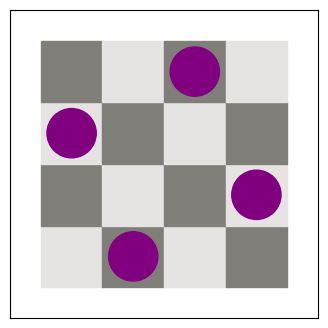

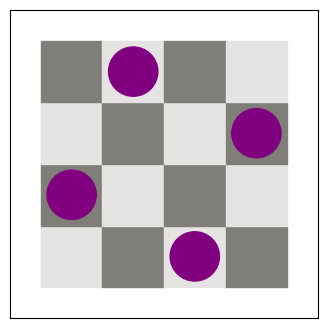

In [76]:

n = 4
solutions = n_queen(n)

# Para cada solução encontrada, plota o tabuleiro e salva a imagem correspondente
for i, solution in enumerate(solutions, 1):
    board = [[0] * n for _ in range(n)]
    # Converte as posições das rainhas na solução para o formato do tabuleiro
    for col, row in enumerate(solution):
        board[row - 1][col] = 1
    plot_chessboard(board, figsize=(n, n))
    plt.savefig(f"solution_{i}.png")
    plt.close()
